# 1. Description of datasets and EDA

In [15]:
import pandas as pd
import numpy as np

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
def read(fn):
    with open(fn, "r") as f:
        d = f.readlines()
    print(d[0])
    return d

In [17]:
def average_sentence_length(dataset):
    return np.mean([len(sentence.split(" ")) for sentence in dataset])

## 1.1 Corpus datasets for training

The "corpus" datasets are used to train word embedding models (i.e. unsupervised learning) to be able to get vectors representing words. The similarity of vectors the n represent semantic association of words in the corpus. The corpuses are "from the wild" and should include examples of societal bias.

### 1.1.1 [BUG dataset](https://github.com/SLAB-NLP/BUG/blob/main/data.tar.gz) from the [paper](https://arxiv.org/pdf/2109.03858.pdf ):

In [18]:
dataset_BUG_stereotype = read("data/corpus/dataset_BUG_stereotype.txt")

"The clinical information of the deceased dentist was provided by his family members , one of whom was also one of the aforementioned 30 OHCWs ."



In [19]:
print(len(dataset_BUG_stereotype))
print(average_sentence_length(dataset_BUG_stereotype))

54203
30.973599247274137


### 1.1.2 [Doughman et al. dataset](https://github.com/jaddoughman/Gender-Bias-Datasets-Lexicons/blob/main/generic_pronouns/dataset.csv) from the [paper](https://arxiv.org/pdf/2201.08675.pdf):

In [20]:
dataset_doughman = read("data/corpus/dataset_doughman.txt")

"( all these are being observed , recorded by a rhymist by his/her deep thoughts and observations)."



In [21]:
print(len(dataset_doughman))
print(average_sentence_length(dataset_doughman))

3509
18.24365916215446


### 1.1.3 [Wikipedia biographies](https://rlebret.github.io/wikipedia-biography-dataset/) dataset originally for text generation.

In [23]:
dataset_wikibios = read("data/corpus/dataset_wikibios.txt")

leonard shenoff randle -lrb- born february 12 , 1949 -rrb- is a former major league baseball player .



In [24]:
print(len(dataset_wikibios))
print(average_sentence_length(dataset_wikibios))

2993276
23.594519516409445


In [28]:
dataset_wikibios

['leonard shenoff randle -lrb- born february 12 , 1949 -rrb- is a former major league baseball player .\n',
 'he was the first-round pick of the washington senators in the secondary phase of the june 1970 major league baseball draft , tenth overall .\n',
 'philippe adnot -lrb- born 25 august 1945 in rhèges -rrb- is a member of the senate of france .\n',
 'he was first elected in 1989 , and represents the aube department .\n',
 'a farmer by profession , he serves as an independent , and also serves as the head of the general council of aube , to which he was elected to represent the canton of méry-sur-seine in 1980 .\n',
 'in 1998 and 2008 , he was re-elected to the senate in the first round , avoiding the need for a run-off vote .\n',
 'having contributed to the creation of the university of technology of troyes , in 1998 he was made the first vice president of the university board , of which he is currently the president .\n',
 "he is a member of the senate 's committee on the laws re

In [29]:
dataset_wikibios_merged = read("data/corpus/dataset_wikibios_merged.txt")

leonard shenoff randle -lrb- born february 12 , 1949 -rrb- is a former major league baseball player . he was the first-round pick of the washington senators in the secondary phase of the june 1970 major league baseball draft , tenth overall .



The merged dataset is what we will use, so that secondary sentences in biographies are kept with original primary sentences (for subject association).

In [30]:
print(len(dataset_wikibios_merged))
print(average_sentence_length(dataset_wikibios_merged))

728321
96.96948049005864


In [31]:
dataset_wikibios_merged

['leonard shenoff randle -lrb- born february 12 , 1949 -rrb- is a former major league baseball player . he was the first-round pick of the washington senators in the secondary phase of the june 1970 major league baseball draft , tenth overall .\n',
 "philippe adnot -lrb- born 25 august 1945 in rhèges -rrb- is a member of the senate of france . he was first elected in 1989 , and represents the aube department . a farmer by profession , he serves as an independent , and also serves as the head of the general council of aube , to which he was elected to represent the canton of méry-sur-seine in 1980 . in 1998 and 2008 , he was re-elected to the senate in the first round , avoiding the need for a run-off vote . having contributed to the creation of the university of technology of troyes , in 1998 he was made the first vice president of the university board , of which he is currently the president . he is a member of the senate 's committee on the laws relating to the freedoms and responsib

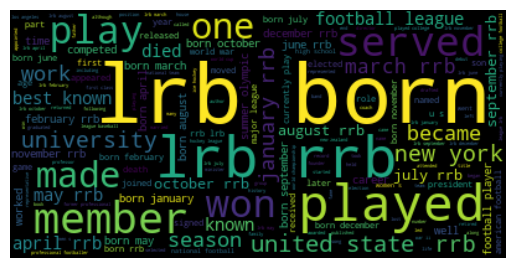

In [41]:
wordcloud = WordCloud().generate(" ".join(dataset_wikibios_merged))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 1.2 Lexicon datasets for testing

The "lexicon" datasets are used to test the inferred vectors embedding certain words. We expect that gender-bias associated words from psychological/sociological studies to be close to gendered words in the learnt vector representations.

**TODO** include all words + inflections in datasets

Note that in all cases, 1 represents male bias, -1 represents female bias, 0 represents neutral/no bias.

### 1.2.1 Test lexicon
The first lexicon is a pure test-accuracy lexicon, to see if definitely gendered words and definitely un-gendered words are correctly classified.

In [46]:
df = pd.read_csv("data/lexicons/test_lexicon.csv")
df.head()

,word,label
0,he,1
1,him,1
2,his,1
3,father,1
4,fatherly,1


In [47]:
df["label"].value_counts()

 1    10
-1    10
 0    10
Name: label, dtype: int64

### 1.2.2 "Bias" lexicon
The second lexicon comes from the Gaucher et al., Konnikov et al. and Bem et al. papers and represent job advert words associated with gender bias and gender non-bias.

In [48]:
df = pd.read_csv("data/lexicons/bias_lexicon.csv")
df.head()

,word,label
0,active,1
1,adventurous,1
2,aggressive,1
3,ambitious,1
4,analytical,1


In [49]:
df["label"].value_counts()

 0    54
 1    52
-1    52
Name: label, dtype: int64

### 1.2.3 Google word2vec test dataset
We will also use the generic word2vec word embedding [test dataset from Google](https://raw.githubusercontent.com/RaRe-Technologies/gensim/develop/gensim/test/test_data/questions-words.txt) which is a non-specific test to see how good word embeddings are (in a generic sense). This is loaded into `gensim` easily.

### 1.2.4 Kainos specifications
We will use the Kainos job specifications to visualise what words may be biased. This is only for visualisation and not evaluation purposes.